<a href="https://colab.research.google.com/github/skughered/wet_finger_investing/blob/main/mort_repayment_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

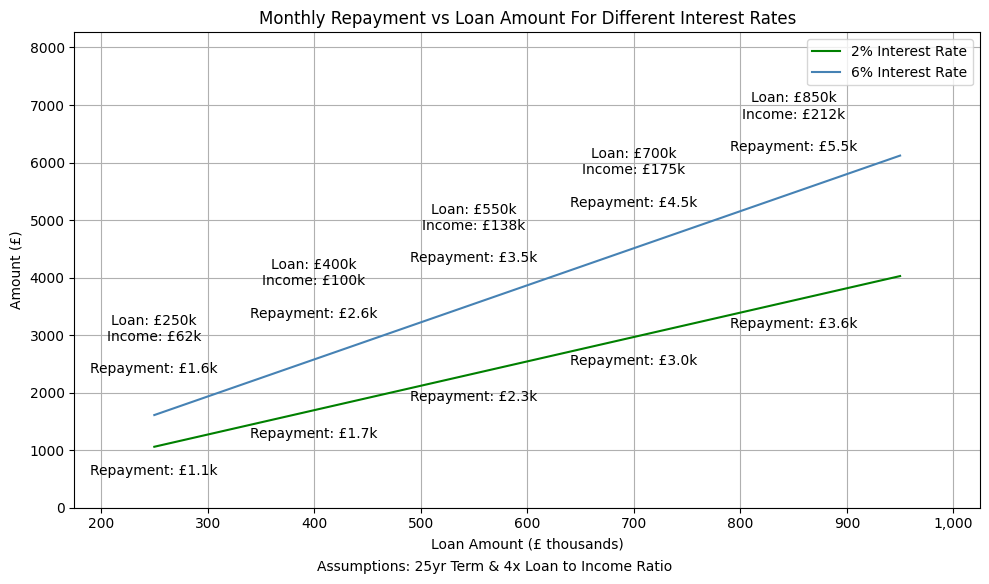

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def calculate_monthly_repayment(loan_amount, annual_interest_rate, loan_term_years):
    monthly_interest_rate = annual_interest_rate / 12 / 100
    num_payments = loan_term_years * 12
    monthly_repayment = (loan_amount * monthly_interest_rate) / (1 - (1 + monthly_interest_rate) ** -num_payments)
    return monthly_repayment

# Parameters
loan_term_years = 25      # 25 years loan term

# Range of loan amounts
loan_amounts = np.arange(250000, 1000000, 50000)

# Calculate monthly repayments for each loan amount at 2% and 6% interest rates
monthly_repayments_2_percent = [calculate_monthly_repayment(amount, 2, loan_term_years) for amount in loan_amounts]
monthly_repayments_6_percent = [calculate_monthly_repayment(amount, 6, loan_term_years) for amount in loan_amounts]

# Calculate income required for each loan amount
required_incomes = [amount / 4 for amount in loan_amounts]

# Plot
plt.figure(figsize=(10, 6))

# Plot monthly repayments for 2% interest rate
plt.plot(loan_amounts, monthly_repayments_2_percent, linestyle='-', color='green', label='2% Interest Rate')
# Plot monthly repayments for 6% interest rate
plt.plot(loan_amounts, monthly_repayments_6_percent, linestyle='-', color='steelblue', label='6% Interest Rate')

plt.title('Monthly Repayment vs Loan Amount For Different Interest Rates')
plt.suptitle('Assumptions: 25yr Term & 4x Loan to Income Ratio', fontsize=10, y=0.01)
plt.xlabel('Loan Amount (£ thousands)')
plt.ylabel('Amount (£)')
plt.grid(True)

# Adjust axis limits
plt.xlim(min(loan_amounts) - 75000, max(loan_amounts) + 75000)
max_repayment = max(max(monthly_repayments_2_percent), max(monthly_repayments_6_percent))
plt.ylim(0, max_repayment + max_repayment * 0.35)  # 35% higher than the max repayment value

# Add stacked annotations for monthly repayments, required incomes, and loan amounts for 2% interest rate
for i in range(len(loan_amounts)):
    if i % 3 == 0:  # Add annotation for every other loan amount to prevent overcrowding
        loan_amt_k = loan_amounts[i] / 1000  # Convert to 'k'
        repayment_k = monthly_repayments_2_percent[i] / 1000  # Convert to 'k'
        income_k = required_incomes[i] / 1000  # Convert to 'k'
        annotation_text = f"Repayment: £{repayment_k:.1f}k"
        plt.annotate(annotation_text, (loan_amounts[i], monthly_repayments_2_percent[i]), textcoords="offset points", xytext=(0,-20), ha='center')

# Add stacked annotations for monthly repayments, required incomes, and loan amounts for 6% interest rate
for i in range(len(loan_amounts)):
    if i % 3 == 0:  # Add annotation for every other loan amount to prevent overcrowding
        loan_amt_k = loan_amounts[i] / 1000  # Convert to 'k'
        repayment_k = monthly_repayments_6_percent[i] / 1000  # Convert to 'k'
        income_k = required_incomes[i] / 1000  # Convert to 'k'
        annotation_text = f"Loan: £{loan_amt_k:.0f}k\nIncome: £{income_k:.0f}k\n\nRepayment: £{repayment_k:.1f}k"
        plt.annotate(annotation_text, (loan_amounts[i], monthly_repayments_6_percent[i]), textcoords="offset points", xytext=(0,30), ha='center')

# Format x-axis tick labels to display in kilo (£k) format
formatter = FuncFormatter(lambda x, _: f'{x/1000:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.legend()
plt.show()